In [1]:
import pandas as pd
import numpy as np
import os
import datetime
import seaborn as sns
from pulp import *
import re 
import matplotlib.pyplot as plt
from IPython.display import Image

###### Minimize calorie consumption for a selection of an item from menu.

1) Objective: Minimize calorie consumption while selecting Optimal food choices

2) LP Form: Minimization

3) Decision Variables: Nutritional facts variable.

4) Constrains: Limited Number of items like 2 or 3 

In [2]:
df = pd.read_excel('C:/Users/suyog957/Desktop/Python/python Optimization/optimization example/MCDONALDS_menu.xlsx')
print(df.shape)
(df.head())

(260, 24)


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [3]:
#df = df[["Category","Item","Serving Size","Vitamin A (% Daily Value)","Vitamin C (% Daily Value)","Calcium (% Daily Value)","Iron (% Daily Value)","Dietary Fiber (% Daily Value)","Carbohydrates (% Daily Value)","Sodium (% Daily Value)","Cholesterol (% Daily Value)","Saturated Fat (% Daily Value)","Total Fat (% Daily Value)","Calories"]]
#print(df.shape)
#(df.head())

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Beverages             27
Chicken & Fish        27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64


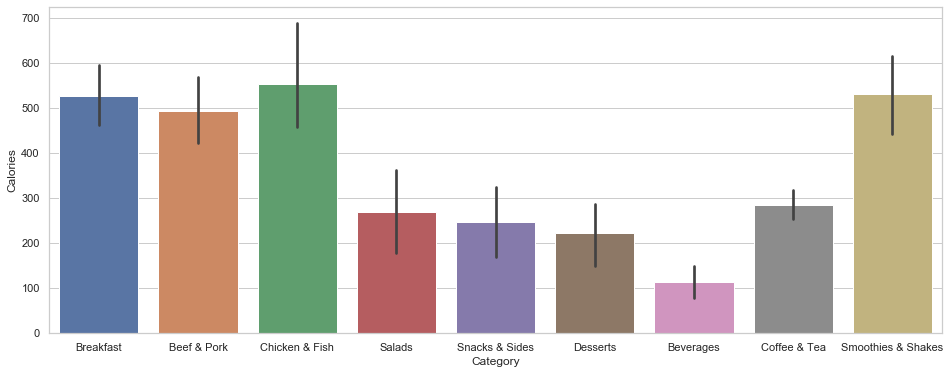

In [4]:
print(df['Category'].value_counts())

plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x="Category", y="Calories", data=df)

#print(df['Category'].value_counts())

###### set up the problem.
establish a problem with ususal variables

In [5]:
prob = pulp.LpProblem('EatingWhat', pulp.LpMinimize)

In [6]:
decision_variables = []
for rownum, row in df.iterrows():
    variable = str('x' + str(rownum))
    variable = pulp.LpVariable(str(variable), lowBound = 0, upBound = 100, cat= 'Integer') #make variables binary
    decision_variables.append(variable)

print ("Total number of decision_variables: " + str(len(decision_variables)))
print ("Array with Decision Variables:" + str(decision_variables))


Total number of decision_variables: 260
Array with Decision Variables:[x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22, x23, x24, x25, x26, x27, x28, x29, x30, x31, x32, x33, x34, x35, x36, x37, x38, x39, x40, x41, x42, x43, x44, x45, x46, x47, x48, x49, x50, x51, x52, x53, x54, x55, x56, x57, x58, x59, x60, x61, x62, x63, x64, x65, x66, x67, x68, x69, x70, x71, x72, x73, x74, x75, x76, x77, x78, x79, x80, x81, x82, x83, x84, x85, x86, x87, x88, x89, x90, x91, x92, x93, x94, x95, x96, x97, x98, x99, x100, x101, x102, x103, x104, x105, x106, x107, x108, x109, x110, x111, x112, x113, x114, x115, x116, x117, x118, x119, x120, x121, x122, x123, x124, x125, x126, x127, x128, x129, x130, x131, x132, x133, x134, x135, x136, x137, x138, x139, x140, x141, x142, x143, x144, x145, x146, x147, x148, x149, x150, x151, x152, x153, x154, x155, x156, x157, x158, x159, x160, x161, x162, x163, x164, x165, x166, x167, x168, x169, x170, x171, x172, x

###### Define Objective Function: (Minimixing the Cost of The Trip)

The variable prob now begins collecting problem data with the += operator. The objective function is logically entered first, with an important comma , at the end of the statement and a short string explaining what this objective function is:



In [7]:
total_calorie = ""

for rownum, row in df.iterrows():
    for i, schedule in enumerate(decision_variables):
        if rownum == i:
            formula = row['Calories']*schedule
            total_calorie += formula

prob += total_calorie
print ("Optimization function: " + str(total_calorie))


Optimization function: 300*x0 + 250*x1 + 430*x10 + 20*x100 + 15*x101 + 150*x102 + 250*x103 + 160*x104 + 150*x105 + 45*x106 + 330*x107 + 340*x108 + 280*x109 + 480*x11 + 140*x110 + 200*x111 + 280*x112 + 100*x113 + 140*x118 + 190*x119 + 510*x12 + 270*x120 + 100*x121 + 140*x126 + 200*x127 + 280*x128 + 100*x129 + 570*x13 + 100*x130 + 130*x131 + 80*x132 + 150*x133 + 190*x134 + 280*x135 + 460*x14 + 150*x141 + 180*x142 + 220*x143 + 110*x144 + 170*x148 + 210*x149 + 520*x15 + 280*x150 + 270*x151 + 340*x152 + 430*x153 + 270*x154 + 330*x155 + 430*x156 + 260*x157 + 330*x158 + 420*x159 + 410*x16 + 210*x160 + 260*x161 + 330*x162 + 100*x163 + 130*x164 + 170*x165 + 200*x166 + 250*x167 + 310*x168 + 200*x169 + 470*x17 + 250*x170 + 310*x171 + 190*x172 + 240*x173 + 300*x174 + 140*x175 + 170*x176 + 220*x177 + 340*x178 + 410*x179 + 540*x18 + 500*x180 + 270*x181 + 330*x182 + 390*x183 + 320*x184 + 390*x185 + 480*x186 + 250*x187 + 310*x188 + 370*x189 + 460*x19 + 360*x190 + 440*x191 + 540*x192 + 280*x193 + 340*x

###### Define constraints.
Selected menu items should not exceed total Fat consumption

In [8]:
fat_limit = 90
total_fat_selected = ""
for rownum, row in df.iterrows():
    for i, schedule in enumerate(decision_variables):
        if rownum == i:
            formula = row['Total Fat (% Daily Value)']*schedule
            total_fat_selected += formula

prob += (total_fat_selected == fat_limit)


In [9]:
print(prob)
prob.writeLP("EatingWhat.lp" )

EatingWhat:
MINIMIZE
300*x0 + 250*x1 + 430*x10 + 20*x100 + 15*x101 + 150*x102 + 250*x103 + 160*x104 + 150*x105 + 45*x106 + 330*x107 + 340*x108 + 280*x109 + 480*x11 + 140*x110 + 200*x111 + 280*x112 + 100*x113 + 140*x118 + 190*x119 + 510*x12 + 270*x120 + 100*x121 + 140*x126 + 200*x127 + 280*x128 + 100*x129 + 570*x13 + 100*x130 + 130*x131 + 80*x132 + 150*x133 + 190*x134 + 280*x135 + 460*x14 + 150*x141 + 180*x142 + 220*x143 + 110*x144 + 170*x148 + 210*x149 + 520*x15 + 280*x150 + 270*x151 + 340*x152 + 430*x153 + 270*x154 + 330*x155 + 430*x156 + 260*x157 + 330*x158 + 420*x159 + 410*x16 + 210*x160 + 260*x161 + 330*x162 + 100*x163 + 130*x164 + 170*x165 + 200*x166 + 250*x167 + 310*x168 + 200*x169 + 470*x17 + 250*x170 + 310*x171 + 190*x172 + 240*x173 + 300*x174 + 140*x175 + 170*x176 + 220*x177 + 340*x178 + 410*x179 + 540*x18 + 500*x180 + 270*x181 + 330*x182 + 390*x183 + 320*x184 + 390*x185 + 480*x186 + 250*x187 + 310*x188 + 370*x189 + 460*x19 + 360*x190 + 440*x191 + 540*x192 + 280*x193 + 340*x19

###### The Actual Optimization:

In [10]:
optimization_result = prob.solve()

assert optimization_result == pulp.LpStatusOptimal
print("Status:", LpStatus[prob.status])
print("Optimal Solution to the problem: ", value(prob.objective))
print ("Individual decision_variables: ")
for v in prob.variables():
    print(v.name, "=", v.varValue)


Status: Optimal
Optimal Solution to the problem:  910.0
Individual decision_variables: 
x0 = 0.0
x1 = 0.0
x10 = 1.0
x100 = 0.0
x101 = 0.0
x102 = 0.0
x103 = 0.0
x104 = 0.0
x105 = 0.0
x106 = 0.0
x107 = 0.0
x108 = 0.0
x109 = 0.0
x11 = 1.0
x110 = 0.0
x111 = 0.0
x112 = 0.0
x113 = 0.0
x118 = 0.0
x119 = 0.0
x12 = 0.0
x120 = 0.0
x121 = 0.0
x126 = 0.0
x127 = 0.0
x128 = 0.0
x129 = 0.0
x13 = 0.0
x130 = 0.0
x131 = 0.0
x132 = 0.0
x133 = 0.0
x134 = 0.0
x135 = 0.0
x14 = 0.0
x141 = 0.0
x142 = 0.0
x143 = 0.0
x144 = 0.0
x148 = 0.0
x149 = 0.0
x15 = 0.0
x150 = 0.0
x151 = 0.0
x152 = 0.0
x153 = 0.0
x154 = 0.0
x155 = 0.0
x156 = 0.0
x157 = 0.0
x158 = 0.0
x159 = 0.0
x16 = 0.0
x160 = 0.0
x161 = 0.0
x162 = 0.0
x163 = 0.0
x164 = 0.0
x165 = 0.0
x166 = 0.0
x167 = 0.0
x168 = 0.0
x169 = 0.0
x17 = 0.0
x170 = 0.0
x171 = 0.0
x172 = 0.0
x173 = 0.0
x174 = 0.0
x175 = 0.0
x176 = 0.0
x177 = 0.0
x178 = 0.0
x179 = 0.0
x18 = 0.0
x180 = 0.0
x181 = 0.0
x182 = 0.0
x183 = 0.0
x184 = 0.0
x185 = 0.0
x186 = 0.0
x187 = 0.0
x188 = 0.0
x

The results are stored If you don't pass the names to the variables and want to append the decision variables back in your desired file format, you want to loop through variable name object.

Depending on your initial data format you might want to parse the results differently. Since in this example we have used pandas dataframe, we will use the number of the variable as index to append the results back to initial dataset

In [11]:
variable_name = []
variable_value = []

for v in prob.variables():
    variable_name.append(v.name)
    variable_value.append(v.varValue)

dt = pd.DataFrame({'variable': variable_name, 'value': variable_value})
for rownum, row in dt.iterrows():
    value = re.findall(r'(\d+)', row['variable'])
    dt.loc[rownum, 'variable'] = int(value[0])

dt = dt.sort_index(by='variable')

#append results
for rownum, row in df.iterrows():
    for results_rownum, results_row in dt.iterrows():
        if rownum == results_row['variable']:
            df.loc[rownum, 'decision'] = results_row['value']

print(df.shape)
(df[:5])

C:\Users\suyog957\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  del sys.path[0]


(260, 25)


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),decision
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,10,4,17,3,17,10,0,25,15,0.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,10,4,17,3,18,6,0,25,8,0.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,10,4,17,2,14,8,0,25,10,0.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,10,4,17,2,21,15,0,30,15,0.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,10,4,17,2,21,6,0,25,10,0.0


###### The Final Decisions and Results of the Optimization 

In [12]:
df[df['decision'] == 1]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),decision
10,Breakfast,Sausage Biscuit (Regular Biscuit),4.1 oz (117 g),430,240,27.0,42,12.0,62,0.0,...,11,2,6,2,11,0,0,6,15,1.0
11,Breakfast,Sausage Biscuit (Large Biscuit),4.6 oz (131 g),480,280,31.0,48,13.0,65,0.0,...,13,3,11,3,11,4,0,8,15,1.0


In [13]:
# df[df['decision'] == 1]['Calories'].sum(axis=10)

#  Alternate ways to do 

In [24]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial


In [45]:
f  = lambda x, y: y #(1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

xmin, xmax, xstep = 0, 2000, 1         # Calories
ymin, ymax, ystep = 0, 200, .5      # Fat

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = y

minima = np.array([155, 9.5])
#f(*minima)

#minima_ = minima.reshape(-1, 1)
#minima_
#f(*minima_)
print(z)

[[  0.    0.    0.  ...   0.    0.    0. ]
 [  0.5   0.5   0.5 ...   0.5   0.5   0.5]
 [  1.    1.    1.  ...   1.    1.    1. ]
 ...
 [199.  199.  199.  ... 199.  199.  199. ]
 [199.5 199.5 199.5 ... 199.5 199.5 199.5]
 [200.  200.  200.  ... 200.  200.  200. ]]


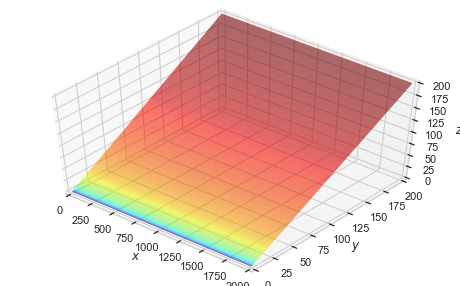

In [46]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z,norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
#ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()


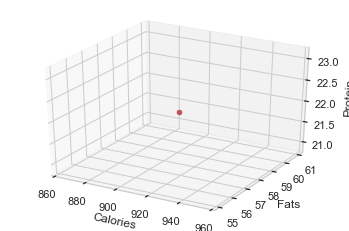

In [56]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = list(range(0, 2000, 1))         # Calories
y = list(range(0, 2000, 1))      # Fat
z = list(range(0, 2000, 1))      # Proteins




ax.scatter(910, 58, 22, c='r', marker='o')

ax.set_xlabel('Calories')
ax.set_ylabel('Fats')
ax.set_zlabel('Protein')

plt.show()
